<a href="https://colab.research.google.com/github/neharika950/Industrial-monitoring-system-based-on-RS485/blob/main/ROVER_RESEARCH_ENVIRONMENTAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Cleaning & Preprocessing for Mars Weather Dataset

In [57]:

import pandas as pd

# Load the dataset (assuming it is in CSV format)
df = pd.read_csv("/content/REMS_Mars_Dataset.csv")

# Drop the specified columns (wind_speed, humidity, weather, sunrise, sunset, earth_date_time, mars_date_time, and sol_number)
df = df.drop(columns=['weather', 'sunrise', 'sunset', 'earth_date_time', 'mars_date_time', 'sol_number', 'wind_speed(m/h)', 'humidity(%)'])

# Check for any missing or null values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Check the cleaned data (just to see the dataframe structure)
print("\nCleaned Dataframe without UV_Radiation:")
print(df.head())

# Verify the missing values after checking
missing_values_after = df.isnull().sum()
print("\nMissing values after checking the dataframe:\n", missing_values_after)

# Sample dataframe to demonstrate One-Hot Encoding for 'UV_Level'
data = {'UV_Level': ['high', 'moderate', 'low', 'high', 'low', 'moderate']}
df_uv = pd.DataFrame(data)

# Perform One-Hot Encoding
df_encoded = pd.get_dummies(df_uv, columns=['UV_Level'], drop_first=False)

# Convert boolean True/False to 1/0
df_encoded = df_encoded.astype(int)

# Display the encoded dataframe
print("\nOne-Hot Encoded DataFrame for UV_Level:")
print(df_encoded)

# Display summary statistics for the dataframe after One-Hot Encoding
print("\nSummary Statistics of the Encoded DataFrame:")
print(df_encoded.describe())

# Check for missing values after One-Hot Encoding
missing_values_encoded_after = df_encoded.isnull().sum()
print("\nMissing values after One-Hot Encoding and NaN filling:")
print(missing_values_encoded_after)


Missing values per column:
 max_ground_temp(°C)     0
min_ground_temp(°C)     0
max_air_temp(°C)        0
min_air_temp(°C)        0
mean_pressure(Pa)       0
UV_Radiation           27
dtype: int64

Cleaned Dataframe without UV_Radiation:
  max_ground_temp(°C) min_ground_temp(°C) max_air_temp(°C) min_air_temp(°C)  \
0                  -3                 -71               10              -84   
1                  -3                 -72               10              -87   
2                  -4                 -70                8              -81   
3                  -6                 -70                9              -91   
4                  -7                 -71                8              -92   

  mean_pressure(Pa) UV_Radiation  
0               707     moderate  
1               707     moderate  
2               708     moderate  
3               707     moderate  
4               708     moderate  

Missing values after checking the dataframe:
 max_ground_temp(°C)     0
min_

Boxplot Visualization of Mars Weather Data

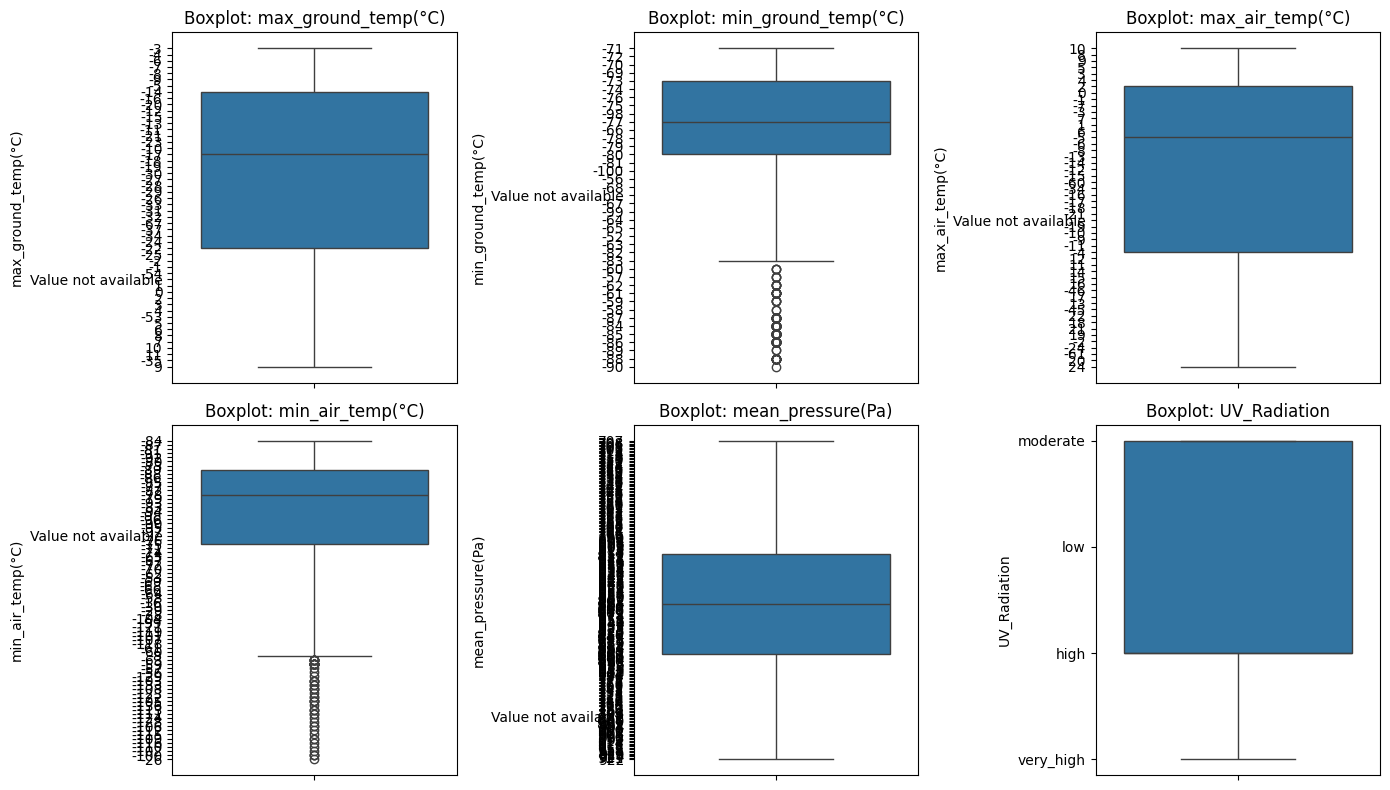

In [58]:
import matplotlib.pyplot as plt # importing the module/library and aliasing it as plt
import seaborn as sns # importing seaborn library, typically used in conjuction with matplotlib

plt.figure(figsize=(14, 8))
for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate features (X) and target (y)
X = df.drop(columns=['UV_Radiation'])
y = df['UV_Radiation']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for some models like SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (2557, 8), Test set size: (640, 8)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Mean Squared Error: 28.193556291007344
Root Mean Squared Error: 5.309760473976895
R² Score: 0.7395823939632402


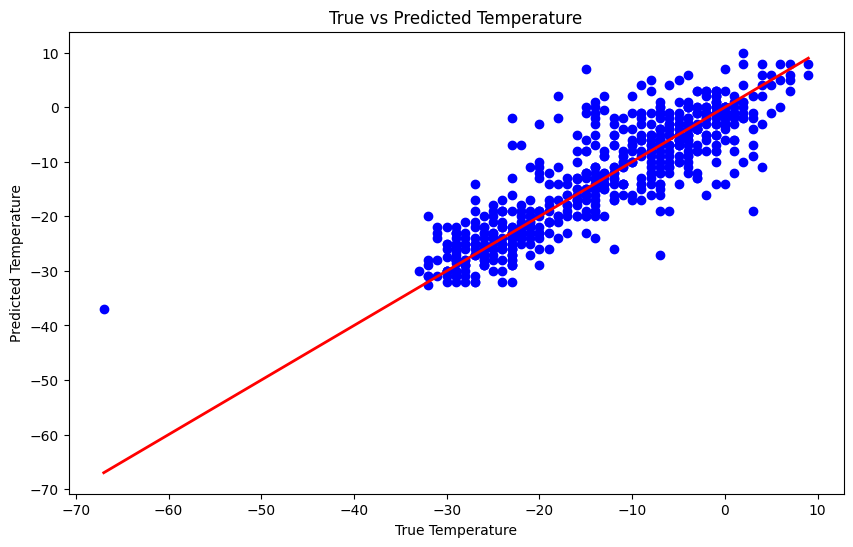

In [79]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare the features (X) and target (y)
X = df.drop(columns=['max_ground_temp(°C)', 'UV_Radiation'])  # Drop target and non-predictive columns
y = df['max_ground_temp(°C)']  # Target variable

# Handle missing values in features (if any)
X = X.fillna(X.mean())  # Replace missing values with mean

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some models like SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Decision Tree Regressor
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train_scaled, y_train)

# Predictions
y_pred = dtree.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('True vs Predicted Temperature')
plt.xlabel('True Temperature')
plt.ylabel('Predicted Temperature')
plt.show()
